In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Maternal Health Risk Data Set.csv')

In [3]:
df.head()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
df = df.drop(columns='RiskLevel',axis=1)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76


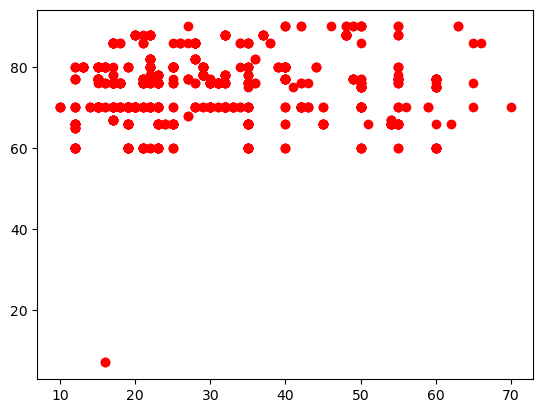

In [5]:
import matplotlib.pyplot as plt

plt.scatter(df['Age'],df['HeartRate'],color='red')

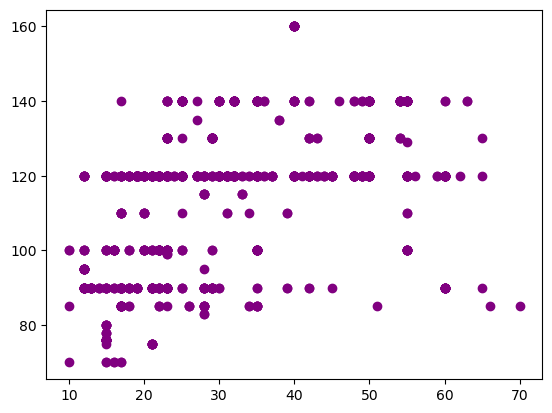

In [24]:
plt.scatter(df['Age'],df['SystolicBP'],color='purple')

In [6]:
from sklearn.ensemble import IsolationForest

In [7]:
clf = IsolationForest(contamination=0.1)
clf.fit(df)
predictions = clf.predict(df)

In [8]:
predictions

array([ 1,  1,  1, ..., -1,  1,  1])

In [9]:
import numpy as np
abn_ind = np.where(predictions<0)
abn_ind

(array([   7,   19,   20,   35,  105,  108,  110,  111,  114,  117,  123,
         124,  130,  131,  152,  166,  167,  180,  191,  210,  232,  239,
         248,  262,  263,  275,  276,  287,  295,  317,  319,  326,  337,
         338,  339,  340,  341,  362,  363,  370,  371,  382,  413,  416,
         417,  419,  422,  425,  426,  428,  431,  432,  435,  442,  458,
         471,  482,  486,  502,  505,  506,  535,  538,  539,  552,  583,
         584,  613,  631,  640,  644,  657,  658,  669,  670,  672,  679,
         683,  687,  689,  787,  789,  849,  910,  928,  940,  955,  959,
         961,  962,  970,  976,  982,  988,  992,  994,  995, 1000, 1005,
        1006, 1010, 1011], dtype=int64),)

In [10]:
X = df.values

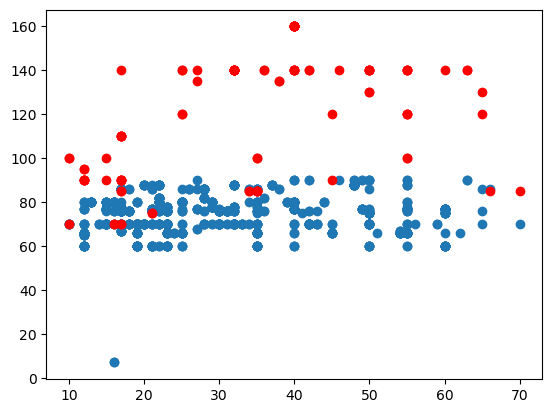

In [11]:
abn_ind = np.where(predictions<0)
plt.scatter(df['Age'],df['HeartRate'])
plt.scatter(X[abn_ind,0],X[abn_ind,1],color='red')

## DBSCAN

In [12]:
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_circles

In [13]:
X,y = make_circles(n_samples=750,noise=0.1,factor=0.3)

In [14]:
X

array([[ 0.81287731,  0.35836546],
       [-0.37872106,  0.11880339],
       [ 0.32709834,  0.26488583],
       ...,
       [-0.28921763,  0.7560058 ],
       [-0.07900697,  0.32339454],
       [ 0.34210179,  0.06366152]])

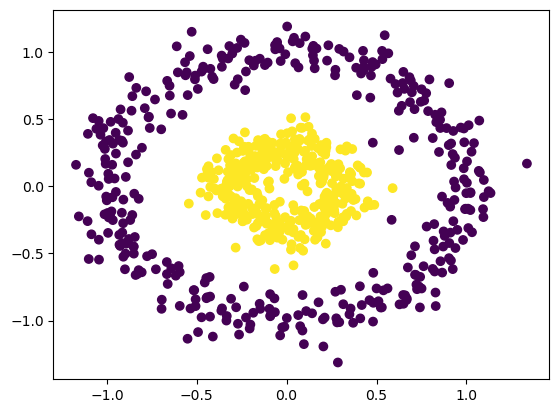

In [15]:
plt.scatter(X[:,0],X[:,1],c=y)

In [16]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.10)

In [17]:
dbscan.fit_predict(X)

array([ 3,  0,  0,  1,  0,  5, -1,  2,  3,  4,  0,  0,  0,  0,  5,  6,  5,
        7,  0,  5, -1,  8,  0,  0,  6,  0,  0, -1,  0,  0,  4,  0,  9,  0,
        0,  0,  3, -1,  6,  3,  0,  0,  0,  1,  4, -1,  0,  0,  3,  0,  0,
        5,  6,  4,  5,  0,  3,  0,  0,  9,  0,  1,  0,  0,  4, -1,  0,  0,
        3,  4,  0,  9, -1,  0,  0,  0,  3,  0,  0,  0,  1,  3,  0,  0,  3,
        3,  0,  1,  1,  0,  1,  5,  0,  7,  0,  3,  0,  1,  4,  5,  0,  0,
        0,  1,  0,  0,  1,  3,  0,  0,  6,  3, -1,  0,  5,  0,  0,  3,  0,
        0, -1,  9, -1,  4,  5,  1,  4,  5,  5,  8,  0,  3, -1,  0,  0,  0,
        0,  3,  9,  0,  0,  5,  0,  0,  0,  2,  0,  6,  0,  0,  0,  0,  0,
        0,  5,  0,  3,  0,  5,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  5,
        0,  1,  0,  3,  0,  4,  0,  0,  0,  1,  0,  5,  0,  0,  0,  9,  4,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  6,  3,  0,  3,  0,  0,  0,  1,
        0,  0,  8,  9,  6,  4,  0,  6,  0,  1,  3, -1,  0,  0,  0,  3,  0,
        3,  4,  0,  7,  0

In [18]:
dbscan.labels_

array([ 3,  0,  0,  1,  0,  5, -1,  2,  3,  4,  0,  0,  0,  0,  5,  6,  5,
        7,  0,  5, -1,  8,  0,  0,  6,  0,  0, -1,  0,  0,  4,  0,  9,  0,
        0,  0,  3, -1,  6,  3,  0,  0,  0,  1,  4, -1,  0,  0,  3,  0,  0,
        5,  6,  4,  5,  0,  3,  0,  0,  9,  0,  1,  0,  0,  4, -1,  0,  0,
        3,  4,  0,  9, -1,  0,  0,  0,  3,  0,  0,  0,  1,  3,  0,  0,  3,
        3,  0,  1,  1,  0,  1,  5,  0,  7,  0,  3,  0,  1,  4,  5,  0,  0,
        0,  1,  0,  0,  1,  3,  0,  0,  6,  3, -1,  0,  5,  0,  0,  3,  0,
        0, -1,  9, -1,  4,  5,  1,  4,  5,  5,  8,  0,  3, -1,  0,  0,  0,
        0,  3,  9,  0,  0,  5,  0,  0,  0,  2,  0,  6,  0,  0,  0,  0,  0,
        0,  5,  0,  3,  0,  5,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  5,
        0,  1,  0,  3,  0,  4,  0,  0,  0,  1,  0,  5,  0,  0,  0,  9,  4,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  6,  3,  0,  3,  0,  0,  0,  1,
        0,  0,  8,  9,  6,  4,  0,  6,  0,  1,  3, -1,  0,  0,  0,  3,  0,
        3,  4,  0,  7,  0

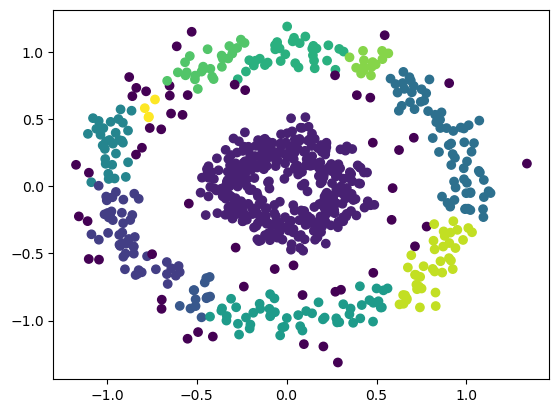

In [19]:
plt.scatter(X[:,0],X[:,1],c=dbscan.labels_)

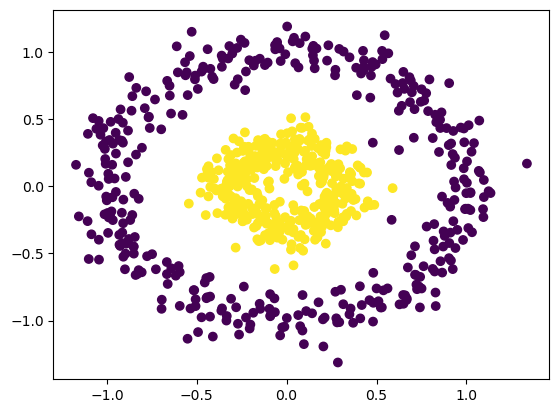

In [20]:
plt.scatter(X[:,0],X[:,1],c=y)

In [21]:
## Local outlier factors

## Local outlier factor 
There are two types of outliers:
1. Local outliers
2. Global outliers

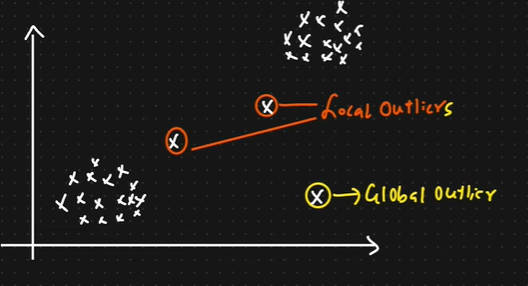

Local outlier factor with the help of K-Nearest Neighbors calculates the local density of a given point. If the local density is low, the point is a local outlier.

## Local outlier factors

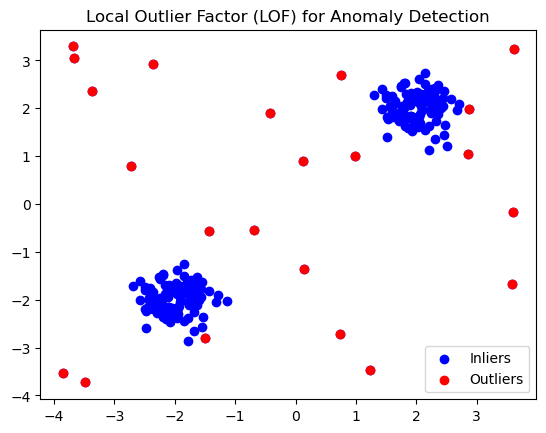

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Generate random data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# Combine inliers and outliers
X = np.r_[X_inliers, X_outliers]

# Fit the LOF model
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)

# Plotting
plt.title("Local Outlier Factor (LOF) for Anomaly Detection")
plt.scatter(X[:, 0], X[:, 1], color='b', label="Inliers")
plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], color='r', label="Outliers")
plt.legend()
plt.show()